In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import History
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split

In [2]:
digits = pd.read_csv("./../datasets/mnist-digits.csv")

In [3]:
digits.shape

(42000, 785)

In [4]:
labels = digits["label"]

In [13]:
df = digits.drop(columns=["label"])

In [20]:
numpy_digits = df.to_numpy().reshape((42000, 28, 28))

In [21]:
numpy_digits = numpy_digits / 255.0

In [44]:
def plot_history(hist: History):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## Visualize first 10 digits

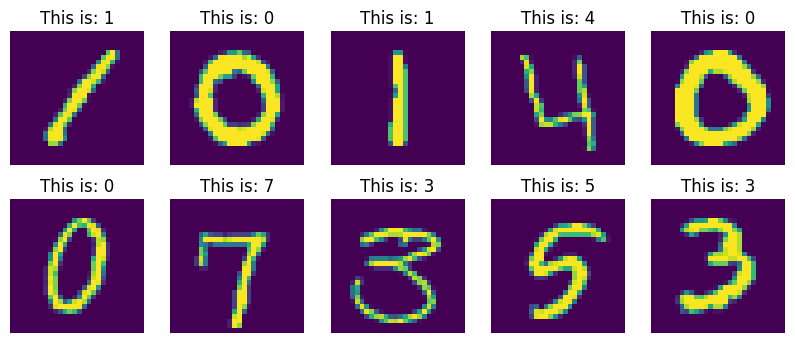

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for digit_img, label, ax in zip(numpy_digits[:10], labels[:10], axes.flatten()):
    ax.imshow(digit_img)
    ax.axis("off")
    ax.set_title(f"This is: {label}")

plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(numpy_digits, labels.to_numpy(), test_size=0.2)

## Creating a NN

In [38]:
model = models.Sequential(
    layers=[
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(70, activation=tf.nn.relu),
        layers.Dense(70, activation=tf.nn.relu),
        layers.Dense(10, activation=tf.nn.softmax)
    ]
)

In [39]:
model.compile(
    optimizer=optimizers.Adam(
        learning_rate=optimizers.learning_rate_schedule.ExponentialDecay(
            initial_learning_rate=0.005,
            decay_rate=0.95,
            decay_steps=100,
        )
    ),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [40]:
history = model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=50,
    validation_data=(x_test, y_test),
)

Epoch 1/50
336/336 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.9085 - val_loss: 0.1746 - val_accuracy: 0.9475
Epoch 2/50
336/336 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9599 - val_loss: 0.1387 - val_accuracy: 0.9567
Epoch 3/50
336/336 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9715 - val_loss: 0.1336 - val_accuracy: 0.9590
Epoch 4/50
336/336 [==============================] - 1s 3ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.1094 - val_accuracy: 0.9687
Epoch 5/50
336/336 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.1055 - val_accuracy: 0.9706
Epoch 6/50
336/336 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.1120 - val_accuracy: 0.9683
Epoch 7/50
336/336 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.1069 - val_accuracy: 0.9699
Epoch 

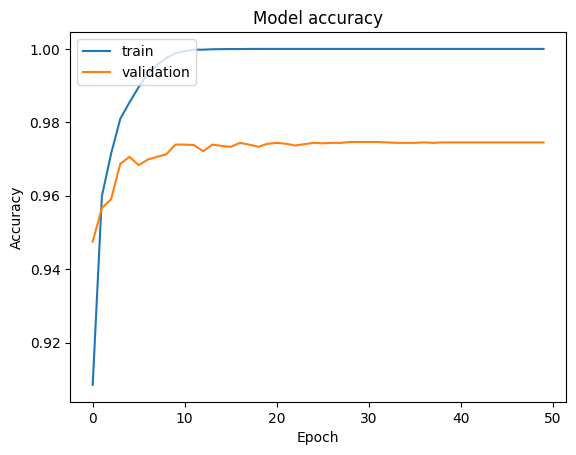

In [45]:
plot_history(history)

In [50]:
predicted_labels = model.predict(x_test)

263/263 [==============================] - 0s 1ms/step


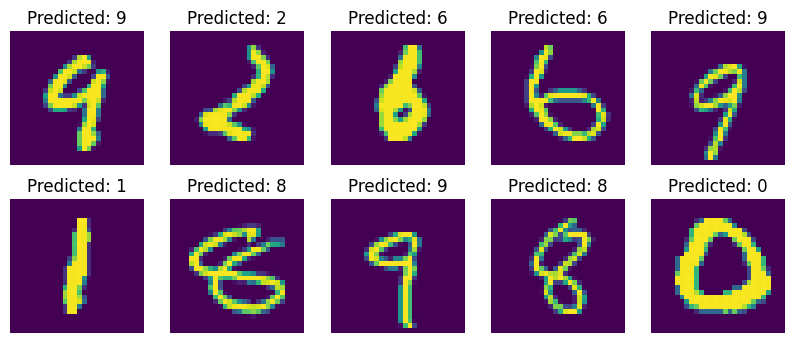

In [56]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for digit_img, pred_label, actual_label, ax in zip(x_test[:10], predicted_labels[:10], y_test[:10], axes.flatten()):
    predicted_label = pred_label.argmax()

    ax.imshow(digit_img)
    ax.axis("off")
    ax.set_title(f"Predicted: {predicted_label}")

plt.show()

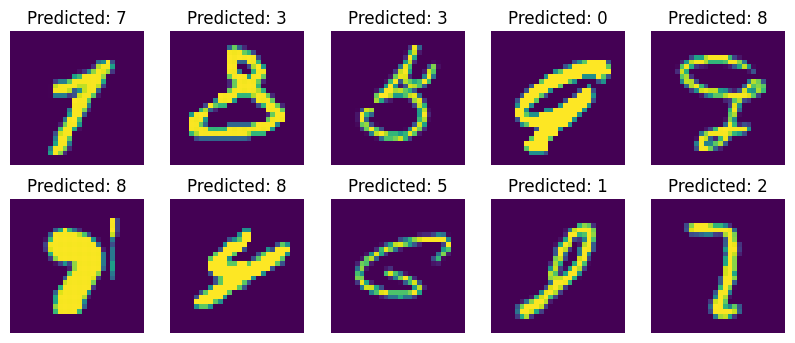

In [60]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

count_errors, idx = 0, 0

while count_errors < 10:
    if predicted_labels[idx].argmax() != y_test[idx]:
        ax = axes.flatten()[count_errors]
        ax.imshow(x_test[idx])
        ax.axis("off")
        ax.set_title(f"Predicted: {predicted_labels[idx].argmax()}")

        count_errors += 1

    idx += 1

plt.show()